# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [98]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


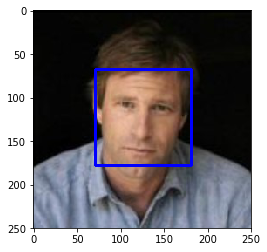

In [99]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [99]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

- Humans: 96.0% (96/100)
- Dogs: 18.0% (18/100)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
from collections import Counter
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# Counter
face_counter = Counter()
dog_with_faces = []
# Human images
for img_path in tqdm(human_files_short):
    face_counter['human'] += int(face_detector(img_path))
    face_counter['human_total'] += 1

# Dog images
for img_path in tqdm(dog_files_short):
    face_detected = face_detector(img_path)
    if face_detected:
        face_counter['dog'] += 1
        dog_with_faces.append(img_path)
    face_counter['dog_total'] += 1

print("Humans: {:3.1f}% ({:2d}/{:3d})".format(face_counter['human'] * 100 / face_counter['human_total'],
                                        face_counter['human'], face_counter['dog_total']))
print("Dogs: {:3.1f}% ({:2d}/{:3d})".format(face_counter['dog'] * 100 / face_counter['dog_total'],
                                     face_counter['dog'], face_counter['dog_total']))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.91it/s]


Humans: 96.0% (96/100)
Dogs: 18.0% (18/100)


Hmm... Lets check those dog images with faces detected. 

As we can see bellow, 4 of those images have human faces on it. Which means that **14 are fake positives**.

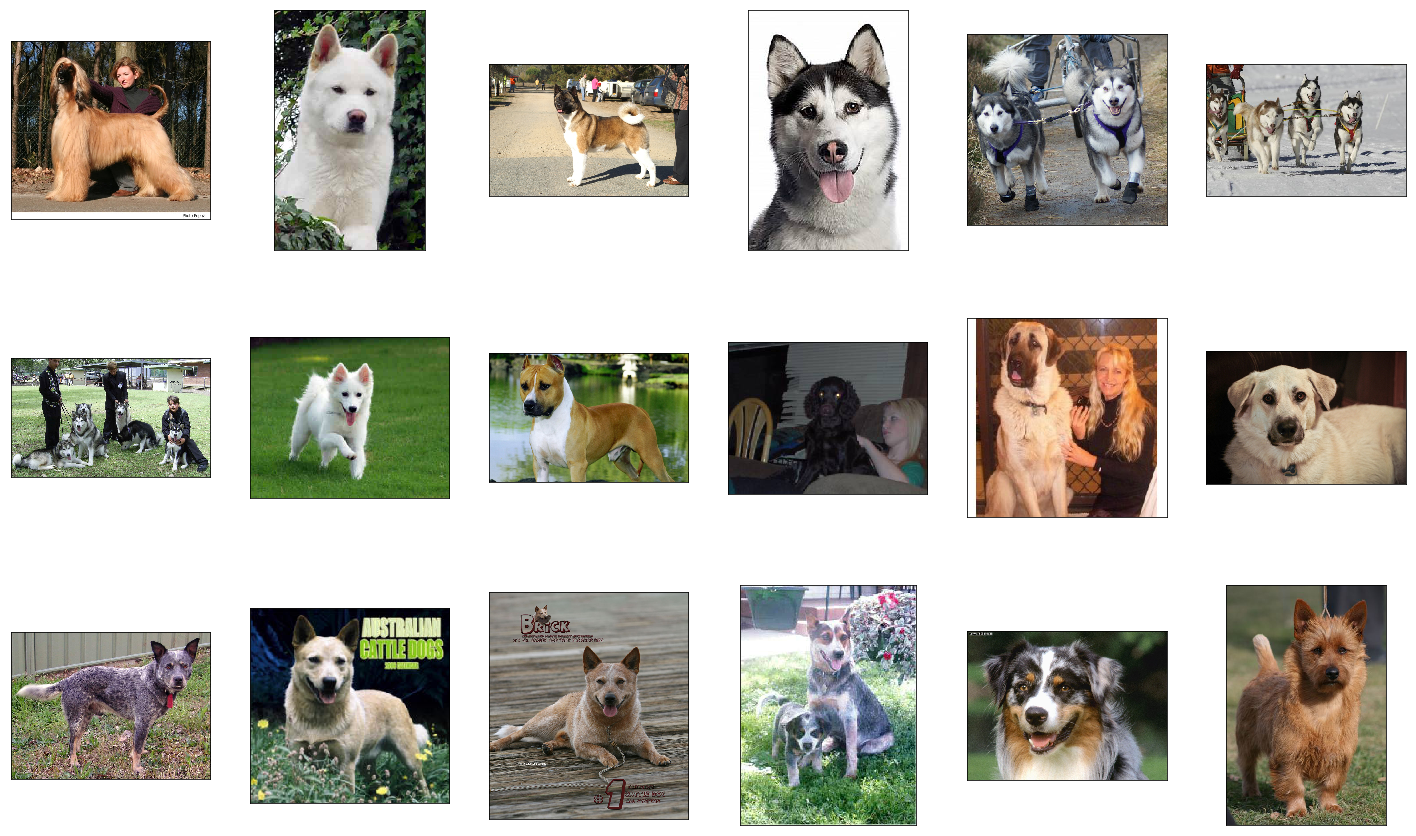

In [5]:
# Check those dog pictures with faces
fig = plt.figure(figsize=(25, 15))
# display 20 images
for idx in np.arange(18):
    # load color (BGR) image
    img = cv2.imread(dog_with_faces[idx])
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(3, 6, idx + 1, xticks=[], yticks=[])
    
    # display the image, along with bounding box
    plt.imshow(cv_rgb)

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

# Making a Simple Model for Face Classification
A simple Network used to detect or not the presence of a Human face in the picture. Code snippets and architecture were inspired from the **Cifar 10 CNN** example of the course, available [here](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb).

In [3]:
# Imports
import os
import shutil
import torch
from PIL import Image
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Resize, RandomRotation, RandomHorizontalFlip, Compose, CenterCrop

## Prepare the data for the Model
First we will write a small script to create a new folder `FaceDetect` to be used in this model. The folder will fulfill the requirements of the `ImageFolder` class. 

**For now, this dataset will only contain pictures of Human/Dog. This mean that our model, cannot be generalize for a more wide application for human face classification. However, the model will likely perform well, because the training data reflects the expected input for our final app.**

In [7]:
# Create a folder for the new dataset
face_dataset_folder = 'FaceClassifier'
face_dataset_train_folder = os.path.join(face_dataset_folder, 'train')
face_dataset_test_folder = os.path.join(face_dataset_folder, 'test')
# Check if directory exists
if not os.path.exists(face_dataset_folder):
    os.makedirs(face_dataset_folder)

# Creates folder for each class
face_folder = 'Face'
not_face_folder = 'NotFace'

train_face_data_path = os.path.join(face_dataset_train_folder, face_folder)
train_not_face_data_path = os.path.join(face_dataset_train_folder, not_face_folder)

test_face_data_path = os.path.join(face_dataset_test_folder, face_folder)
test_not_face_data_path = os.path.join(face_dataset_test_folder, not_face_folder)

In [8]:
# Creates the directories
os.makedirs(train_face_data_path, exist_ok=True)
os.makedirs(train_not_face_data_path, exist_ok=True)
os.makedirs(test_face_data_path, exist_ok=True)
os.makedirs(test_not_face_data_path, exist_ok=True)

# Copy the data to each folder for train and testing
print("Copying Training Data...")
train_size_1 = int(len(human_files) * .8)
for img in tqdm(human_files[:train_size_1]):
    shutil.copy(img, train_face_data_path)
train_size_2 = int(len(dog_files) * .8)
for img in tqdm(dog_files[:train_size_2]):
    shutil.copy(img, train_not_face_data_path)

print("Copying Testing Data...")
for img in tqdm(human_files[train_size_1:]):
    shutil.copy(img, test_face_data_path)
for img in tqdm(dog_files[train_size_2:]):
    shutil.copy(img, test_not_face_data_path)

Copying Training Data...


100%|██████████████████████████████████████████████████████████████████████████████| 6680/6680 [01:38<00:00, 67.87it/s]


Copying Testing Data...


100%|██████████████████████████████████████████████████████████████████████████████| 1671/1671 [00:34<00:00, 48.31it/s]


Creates the Dataset and check its size

In [8]:
# Transformations with some Data Augmentation
transforms_train = Compose([Resize(255),
                            CenterCrop(224),
                            RandomRotation(15),
                            RandomHorizontalFlip(),
                            ToTensor()
                           ])

transforms_test = Compose([Resize(255),
                           CenterCrop(224),
                           ToTensor()
                          ])

train_dataset = ImageFolder(face_dataset_train_folder, transform=transforms_train)
test_dataset = ImageFolder(face_dataset_test_folder, transform=transforms_test)
print(len(train_dataset))
print(len(test_dataset))


17266
4318


In [9]:
# Settings
batch_size = 32

# Data Loaders
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=3)
test_loader = DataLoader(test_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=3)

NotFace


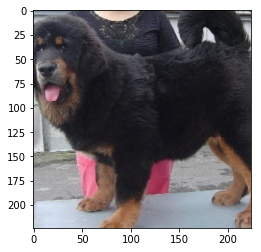

In [10]:
# Check is data_loaders are working
def imshow(img, ax):
    # Transpose image
    ax.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

# Check data
iterable_test = iter(test_loader)
img, label = iterable_test.next()
fig, ax = plt.subplots(1,1)
img = img.numpy()[0]
imshow(img, ax)
print(test_dataset.classes[label.numpy()[0]])

## Model Architecture

In [4]:
class FaceClassifierNet(nn.Module):
    """
    Network defining class.
    """
    def __init__(self):
        super(FaceClassifierNet, self).__init__()
        
        # Convolutional layer (sees 224x224x3 tensor)
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        # Convolutional layer (sees 112x112x8 tensor)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        # Convolutional layer (sees 56x56x16 tensor)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        # Convolutional layer (sees 28x28x32 tensor)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        # Max pooling layer (divides spacial values by 2)
        self.pool = nn.MaxPool2d(2, 2)
        # Linear layer (64 * 14 * 14 -> 512)
        self.fc1 = nn.Linear(64 * 14 * 14, 512)
        # Linear layer (512 -> 1)
        self.fc2 = nn.Linear(512, 1)
        # Dropout layer (p=0.4)
        self.dropout = nn.Dropout(0.4)
    
    def forward(self, x):
        # Sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        # Flatten result
        x = x.view(-1, 64 * 14 * 14)
        # Dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, w/o relu activation
        x = torch.sigmoid(self.fc2(x))
        
        return x
        

In [12]:
# check if CUDA is available
train_device = 'cuda' if torch.cuda.is_available() else 'cpu'

if train_device == 'cpu':
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [13]:
# Defines Model
model = FaceClassifierNet()

model.to(train_device)

FaceClassifierNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
  (dropout): Dropout(p=0.4)
)

## Train the Model

In [10]:
from torch import optim

# specify loss function
criterion = nn.BCELoss()

# specify optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [18]:
# number of epochs to train the model
n_epochs = 1

valid_loss_min = np.Inf # track change in validation loss
model = model.to(train_device).double()
for epoch in range(1, n_epochs + 1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    itert = iter(train_loader)
    # Training 
    print("EPOCH {}/{}".format(epoch, n_epochs + 1))
    for i in tqdm(range(len(train_loader))):
        try:
            data, target = itert.next()
        except OSError:
            continue
        # move tensors to GPU if CUDA is available
        data, target = data.to(train_device).double(), target.to(train_device).double()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target.view(-1, 1))
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item() * data.size(0)
        
    ######################    
    # validate the model #
    ######################
    print("Validating Resulst...")
    # Deal with corrupted file
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        data, target = data.to(train_device).double(), target.to(train_device).double()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target.view(-1, 1))
        # update average validation loss 
        valid_loss += loss.item() * data.size(0)
    
    # calculate average losses
    train_loss = train_loss / len(train_loader.dataset)
    valid_loss = valid_loss / len(test_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_faceClassifier.pt')
        valid_loss_min = valid_loss

EPOCH 1/2


100%|████████████████████████████████████████████████████████████████████████████████| 540/540 [01:51<00:00,  5.53it/s]


Validating Resulst...
Epoch: 1 	Training Loss: 0.310918 	Validation Loss: 0.184043
Validation loss decreased (inf --> 0.184043).  Saving model ...


## Test Model

In [5]:
# Test model
def process_image(image):
    """
    Scales, crops, and normalizes a PIL image for a PyTorch model, returns an Numpy array.

    Args:
        image: PIL image.

        img: Numpy array.
    """
    # Resize
    size = (255, 255)
    image.thumbnail(size, Image.ANTIALIAS)
    
    # Center Crop
    new_size = 224
    width, height = image.size  # Get dimensions
    left = (width - new_size) / 2
    top = (height - new_size) / 2
    right = (width + new_size) / 2
    bottom = (height + new_size) / 2
    image = image.crop((left, top, right, bottom))
    # Convert RGB
    image = image.convert("RGB")
    
    # Convert to numpy
    img = np.array(image, dtype=float)
    # Normalize
    img = img / 255
    
    # Transpose
    image = img.transpose((2, 0, 1))
    return image
    
# loads a checkpoint and rebuilds the model
def load_model(filepath):
    # Load file data
    checkpoint = torch.load(filepath, map_location='cpu')
    # Model untrained
    model = FaceClassifierNet()
    # Load weights
    model.load_state_dict(checkpoint)
    
    return model

# Uses the model to predict image
def predict(model, image_path, device='cuda'):
    # Prepare image
    img = Image.open(image_path)
    np_img = process_image(img)
    tensor_img = torch.tensor(np_img).unsqueeze(0)
    tensor_img = tensor_img.to(device).double()
    
    # Predictions
    model.eval()    # garantes prediction mode
    model = model.to(device).double()
    with torch.no_grad():
        # Batch of size 1
        output = model(tensor_img)
        # change output for more intuitive 0: not face 1: face
        prob = 1 - output[0].cpu().numpy()
        prediction = int(prob >= .5)
    
    return prediction, prob

Probability: [0.9974381]
Prediction: 1
Label: 1
{'Face': 0, 'NotFace': 1}


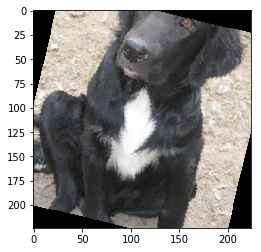

In [17]:
# Load model 
model = load_model('model_faceClassifier_trained.pt')

# Evaluates model
model.eval()
model.to(train_device)
iter_test = iter(train_loader)
with torch.no_grad():
    data, target = next(iter_test)
    # move tensors to GPU if CUDA is available
    data, target = data.to(train_device), target.to(train_device)
    output = model(data)
    prob = output[0].cpu().numpy()
    prediction = int(prob > .5)
    real_label = target[0].cpu().numpy()

fig, ax = plt.subplots(1,1)
img = data.cpu()[0]
imshow(img, ax)
print("Probability: {}".format(prob))
print("Prediction: {}".format(prediction))
print("Label: {}".format(real_label))
print(test_dataset.class_to_idx)


In [17]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

# Load model 
model = load_model('model_faceClassifier_trained.pt')

# Counter
face_counter = Counter()
false_positives = {'imgs': [], 'probs': []}
false_negatives = {'imgs': [], 'probs': []}
# Human images
for img_path in tqdm(human_files_short):
    face_detected, prob = predict(model, img_path)
    if face_detected:
        face_counter['human'] += 1
    else:
        false_negatives['imgs'].append(img_path)
        false_negatives['probs'].append(prob)
    face_counter['human_total'] += 1

# Dog images
for img_path in tqdm(dog_files_short):
    face_detected, prob = predict(model, img_path)
    if face_detected:
        face_counter['dog'] += 1
        false_positives['imgs'].append(img_path)
        false_positives['probs'].append(prob)
    face_counter['dog_total'] += 1

print("Humans: {:3.1f}% ({:2d}/{:3d})".format(face_counter['human'] * 100 / face_counter['human_total'],
                                        face_counter['human'], face_counter['dog_total']))
print("Dogs: {:3.1f}% ({:2d}/{:3d})".format(face_counter['dog'] * 100 / face_counter['dog_total'],
                                     face_counter['dog'], face_counter['dog_total']))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 74.05it/s]


Humans: 97.0% (97/100)
Dogs: 1.0% ( 1/100)


We can see that the results are better than the previous OpenCV model. It shows similar performance in humans pictures and a great improvement not detecting faces on the dogs prictures.

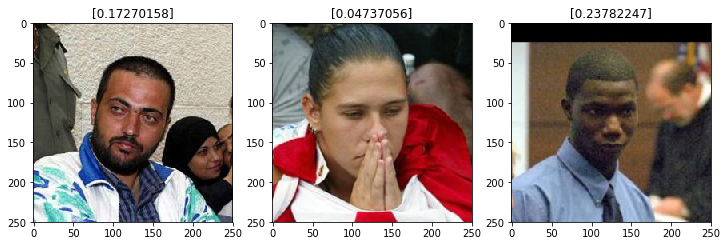

In [18]:
# Undetected human faces
fig = plt.figure(figsize=(25, 15))
# display 20 images
for idx in np.arange(3):
    # load color (BGR) image
    img = cv2.imread(false_negatives['imgs'][idx])
#     img = cv2.imread(false_positives['imgs'][idx])
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(3, 6, idx + 1)#, xticks=[], yticks=[])
#     ax.set_title(str(false_positives['probs'][idx]))
    ax.set_title(str(false_negatives['probs'][idx]))
    # display the image, along with bounding box
    ax.imshow(cv_rgb)

In [6]:
# Load model 
model = load_model('model_faceClassifier_trained.pt')

# New face detector
def face_detector(img_path):
    face_detected, _ = predict(model, img_path)
    return face_detected

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
train_device = 'cuda' if torch.cuda.is_available() else 'cpu'

# move model to GPU if CUDA is available
VGG16 = VGG16.to(train_device)

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as T

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    # Transformations needed
    transforms_img = T.Compose([T.Resize(255),
                                T.CenterCrop(224),
                                T.ToTensor(),
                                T.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225]),
                               ])
    
    img = Image.open(img_path)
    tensor_img = transforms_img(img).unsqueeze(0).to(train_device).double()
    VGG16.eval()    # garantes prediction mode
    VGG16.double()  # Some windows specific errors
    with torch.no_grad():
        model_output = VGG16(tensor_img)
        out = torch.softmax(model_output, dim=1)
    
    # Results
    probs, idxs = out.topk(1)
    idxs = int(idxs.cpu().numpy().squeeze(0))      # idxs as numpy array
    probs = probs.cpu().numpy().squeeze(0)    # probs as numpy array
    
    return idxs # predicted class index

In [9]:
# Bulldog image
VGG16_predict('images/Brittany_02625.jpg')

215

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    
    if index >= 151 and index <= 268:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- Humans: 0.0% ( 0/100)
- Dogs: 93.0% (93/100)

In [25]:
from collections import Counter
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
# Counter
dog_counter = Counter()
false_positives = {'imgs': []}
false_negatives = {'imgs': []}
# Human images
for img_path in tqdm(human_files_short):
    dog_detected = dog_detector(img_path)
    if dog_detected:
        dog_counter['human'] += 1
        false_positives['imgs'].append(img_path)
    dog_counter['human_total'] += 1

# Dog images
for img_path in tqdm(dog_files_short):
    dog_detected = dog_detector(img_path)
    if dog_detected:
        dog_counter['dog'] += 1
    else:
        false_negatives['imgs'].append(img_path)
    dog_counter['dog_total'] += 1

print("Humans: {:3.1f}% ({:2d}/{:3d})".format(dog_counter['human'] * 100 / dog_counter['human_total'],
                                        dog_counter['human'], dog_counter['dog_total']))
print("Dogs: {:3.1f}% ({:2d}/{:3d})".format(dog_counter['dog'] * 100 / dog_counter['dog_total'],
                                     dog_counter['dog'], dog_counter['dog_total']))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.38it/s]


Humans: 0.0% ( 0/100)
Dogs: 93.0% (93/100)


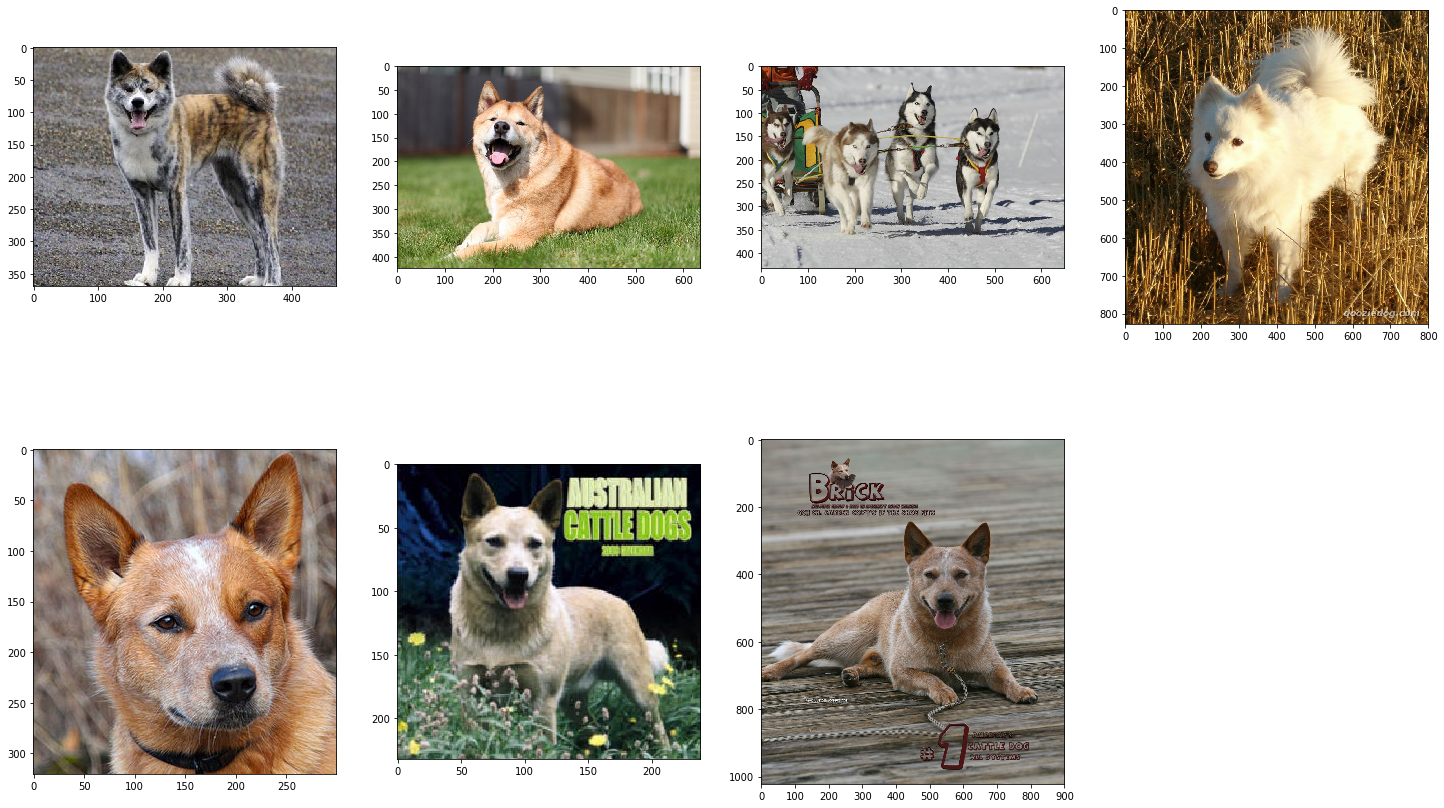

In [21]:
# Check dog pictures not detected
fig = plt.figure(figsize=(25, 15))
# display 20 images
for idx in np.arange(7):
    # load color (BGR) image
    img = cv2.imread(false_negatives['imgs'][idx])
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(2, 4, idx + 1)#, xticks=[], yticks=[])
    # display the image, along with bounding box
    ax.imshow(cv_rgb)

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [11]:
# TEsting other models trained on ImageNet
import torch
import torchvision.models as models

# define models
RESNET101 = models.resnet101(pretrained=True)
INCEPTV3 = models.inception_v3(pretrained=True)
DENSENET121 = models.densenet121(pretrained=True)

# Models image size
RESNET101.img_size = 224
INCEPTV3.img_size = 299
DENSENET121.img_size = 224

train_device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Move to GPU if available
RESNET101 = RESNET101.to(train_device)
INCEPTV3 = INCEPTV3.to(train_device)
DENSENET121 = DENSENET121.to(train_device)

# List of models to compare
pretrained_models = [RESNET101, 
                     INCEPTV3,
                     DENSENET121]

c:\program files\python36\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [12]:
def pretrained_predict(model, img_path):
    '''
    Use pre-trained model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to ImageNEt model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    # Transformations needed
    transforms_img = T.Compose([T.Resize(model.img_size + 31),
                                T.CenterCrop(model.img_size),
                                T.ToTensor(),
                                T.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225]),
                               ])
    
    img = Image.open(img_path)
    tensor_img = transforms_img(img).unsqueeze(0).to(train_device).double()
    model.eval()    # garantes prediction mode
    model.double()  # Some windows specific errors
    with torch.no_grad():
        model_output = model(tensor_img)
        out = torch.softmax(model_output, dim=1)
    
    # Results
    probs, idxs = out.topk(1)
    idxs = int(idxs.cpu().numpy().squeeze(0))      # idxs as numpy array
    probs = probs.cpu().numpy().squeeze(0)    # probs as numpy array
    
    return idxs # predicted class index

In [28]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_2(model, img_path):
    ## TODO: Complete the function.
    index = pretrained_predict(model, img_path)
    
    if index >= 151 and index <= 268:
        return True
    else:
        return False

In [28]:
# Test all 3 models
pretrained_models_names = ['ResNet101', 'Inception V3', 'DenseNet121']
for model, name in zip(pretrained_models, pretrained_models_names):
    print("{} Performance".format(name))
    # Counter
    dog_counter = Counter()
    false_positives = {'imgs': []}
    false_negatives = {'imgs': []}
    # Human images
    for img_path in tqdm(human_files_short):
        dog_detected = dog_detector_2(model, img_path)
        if dog_detected:
            dog_counter['human'] += 1
            false_positives['imgs'].append(img_path)
        dog_counter['human_total'] += 1

    # Dog images
    for img_path in tqdm(dog_files_short):
        dog_detected = dog_detector_2(model, img_path)
        if dog_detected:
            dog_counter['dog'] += 1
        else:
            false_negatives['imgs'].append(img_path)
        dog_counter['dog_total'] += 1

    print("Humans: {:3.1f}% ({:2d}/{:3d})".format(dog_counter['human'] * 100 / dog_counter['human_total'],
                                            dog_counter['human'], dog_counter['dog_total']))
    print("Dogs: {:3.1f}% ({:2d}/{:3d})".format(dog_counter['dog'] * 100 / dog_counter['dog_total'],
                                         dog_counter['dog'], dog_counter['dog_total']))

ResNet101 Performance


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.83it/s]


Humans: 0.0% ( 0/100)
Dogs: 94.0% (94/100)
Inception V3 Performance


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.15it/s]


Humans: 0.0% ( 0/100)
Dogs: 95.0% (95/100)
DenseNet121 Performance


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.98it/s]


Humans: 0.0% ( 0/100)
Dogs: 93.0% (93/100)


All models performed similarly. However, since Inception V3 performed slightly better we will use it.

In [106]:
# New Dog Detector
def dog_detector(img_path):
    ## INCEPTION V3 - Best model
    index = pretrained_predict(INCEPTV3, img_path)
    
    if index >= 151 and index <= 268:
        return True
    else:
        return False 

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [18]:
from torchvision import transforms as T
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_dog_folder = 'dogImages/train'
test_dog_folder = 'dogImages/test'
valid_dog_folder = 'dogImages/valid'

# Transformations with some Data Augmentation for train data
transforms_train = T.Compose([T.Resize(255),
                              T.RandomCrop(224),
                              T.RandomRotation(5),
                              T.RandomHorizontalFlip(),
                              T.ToTensor()
                             ])

transforms_test_valid = T.Compose([T.Resize(224),
                                   T.CenterCrop(224),
                                   T.ToTensor()
                                  ])
# Datasets
train_dog_dataset = ImageFolder(train_dog_folder, transform=transforms_train)
test_dog_dataset = ImageFolder(test_dog_folder, transform=transforms_test_valid)
valid_dog_dataset = ImageFolder(valid_dog_folder, transform=transforms_test_valid)

# DataLoaders
loaders_scratch = {}
batch_size = 8
loaders_scratch['train'] = DataLoader(train_dog_dataset, batch_size, shuffle=True, num_workers=3)
loaders_scratch['test'] = DataLoader(test_dog_dataset, batch_size, shuffle=True, num_workers=3)
loaders_scratch['valid'] = DataLoader(valid_dog_dataset, batch_size, shuffle=True, num_workers=3)

print(len(train_dog_dataset))
print(len(test_dog_dataset))
print(len(valid_dog_dataset))

6680
836
835


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- The final image is obtained by the `Resize` class of the transform package which uses bilinear interpolation to stretch the image, then `RandomCrop` or `CenterCrop` to perform a square random crop of the resulting image. The final size of the image is (224 x 224). First, because it is the same size used in most `torchvision.models` and, therefore, it must have been tested to be an appropriate image size. Additionally, the fact that $224=2^5.7$ facilitates the use of sequences of Convolution/MaxPool Layers, since that after each layer the spacial dimension is reduced by a factor of 2.

- Yes, the following operations were performed in the training dataset:
   - Random Crop on an image (255 x 255) to (224 x 224).
   - Random Rotation between (-5, 5) degrees.
   - Random Horizontal Flip with 50% probability.
   - Rescaled the Data from (0, 255) to (0, 1).

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # Convolutional layer (sees 224x224x3 tensor)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        # Convolutional layer (sees 112x112x32 tensor)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        # Convolutional layer (sees 56x56x64 tensor)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        # Convolutional layer (sees 28x28x128 tensor)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        # Convolutional layer (sees 14x14x256 tensor)
        # self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
        # Max pooling layer (divides spacial values by 2)
        self.pool = nn.MaxPool2d(2, 2)
        # Linear layer (64 * 14 * 14 -> 512)
#         self.fc1 = nn.Linear(64 * 14 * 14, 512)
        # Linear layer (512 * 7 * 7 -> 512)
        self.fc1 = nn.Linear(256 * 14 * 14, 1024)
        # Linear layer (512 -> 256)
        #self.fc2 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(1024, 256)
        # Linear layer (256 -> 133)
        self.fc3 = nn.Linear(256, 133)
        # Dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.1)
    
    def forward(self, x):
        ## Define forward behavior
        # Sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        # x = self.pool(F.relu(self.conv5(x)))
        # Flatten result
        #  x = x.view(-1, 64 * 14 * 14)
        x = x.view(-1, 256 * 14 * 14)
        # Dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # output layer, w/o activation
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

The architecture was inspired by VGG Model Architecture and the CNN examples in the course. It consists of a sequence of Conv2D Layers (with kernel size 3x3 and padding 1) and MaxPool Layers (kernel 2x2 and stride 2). This way each **2D Convolution** increases the depth, and each **2D Pooling** reduces the height and width. This is performed 4 times, resulting in a final output of size 14x14x256. Then, this result is flattened and feed to 2 **Fully Connected (FC)** Layers with ReLU activation function and 1024 and 256 output nodes respectively. As well as Dropout Layers with 1% between the FC Layers. Finally, another **Fully Connected** layer with 133 outputs gives the final result of the Network.

**Architecture:** _(Ignoring the batch size dimension)_
- INPUT(224, 224, 3) -> Conv2D (kernel 3x3, padding 1)/MaxPool (kernel 2x2, stride 2) -> OUTPUT(112, 112, 32)
- INPUT(112, 112, 32) -> Conv2D (kernel 3x3, padding 1)/MaxPool (kernel 2x2, stride 2) -> (56, 56, 64)
- INPUT(56, 56, 64) -> Conv2D (kernel 3x3, padding 1)/MaxPool (kernel 2x2, stride 2) -> (28, 28, 128)
- INPUT(28, 28, 128) -> Conv2D (kernel 3x3, padding 1)/MaxPool (kernel 2x2, stride 2) -> (14, 14, 256)
- INPUT(14, 14, 256) -> Flattening + Dropout(1%) -> OUTPUT(50176)
- INPUT(50176) -> Fully Connected (ReLU Activation) + Dropout(1%) -> OUTPUT(1024)
- INPUT(1024) -> Fully Connected (ReLU Activation) + Dropout(1%) -> OUTPUT(256)
- INPUT(256) -> Fully Connected -> OUTPUT(133)


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [20]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [4]:
import numpy as np
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs + 1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        train_iterator = iter(loaders['train'])
        for batch_idx in range(len(loaders['train'].dataset)):
            try:
                data, target = train_iterator.next()
            except OSError:
                continue
                print("aa")
            except StopIteration:
                break
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            
            optimizer.zero_grad()
            output = model(data)
            ## find the loss and update the model parameters accordingly
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            ## record the average training loss, using something like
            train_loss += loss.item() * data.size(0)
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
                loss = criterion(output, target)
                valid_loss += loss.item() * data.size(0)
            
        train_loss = train_loss / len(loaders['train'].dataset)
        valid_loss = valid_loss / len(loaders['valid'].dataset)
        
        
        ## TODO: save the model if validation loss has decreased
        save_model = False
        if valid_loss < valid_loss_min:
            # update the min_loss
            valid_loss_min = valid_loss
            # Saves the model
            torch.save(model.state_dict(), save_path)
            save_model = True
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tSaving Model: {}'.format(
            epoch, 
            train_loss,
            valid_loss,
            save_model
            ))
    # return trained model
    return model


# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
state_dict = torch.load('model_scratch.pt')
model_scratch.load_state_dict(state_dict)

Epoch: 1 	Training Loss: 4.878996 	Validation Loss: 4.872422 	Saving Model: True
Epoch: 2 	Training Loss: 4.865360 	Validation Loss: 4.853750 	Saving Model: True
Epoch: 3 	Training Loss: 4.791465 	Validation Loss: 4.727187 	Saving Model: True
Epoch: 4 	Training Loss: 4.682652 	Validation Loss: 4.619575 	Saving Model: True
Epoch: 5 	Training Loss: 4.549555 	Validation Loss: 4.788352 	Saving Model: False
Epoch: 6 	Training Loss: 4.410109 	Validation Loss: 4.379943 	Saving Model: True
Epoch: 7 	Training Loss: 4.305459 	Validation Loss: 4.301043 	Saving Model: True
Epoch: 8 	Training Loss: 4.221005 	Validation Loss: 4.162168 	Saving Model: True
Epoch: 9 	Training Loss: 4.114149 	Validation Loss: 4.026437 	Saving Model: True
Epoch: 10 	Training Loss: 4.026431 	Validation Loss: 4.217606 	Saving Model: False
Epoch: 11 	Training Loss: 3.943757 	Validation Loss: 3.997949 	Saving Model: True
Epoch: 12 	Training Loss: 3.870118 	Validation Loss: 4.114148 	Saving Model: False
Epoch: 13 	Training Lo

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
# load the model that got the best validation accuracy
state_dict = torch.load('model_scratch_18.pt')
model_scratch.load_state_dict(state_dict)

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.514606


Test Accuracy: 18% (154/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders

train_dog_folder = 'dogImages/train'
test_dog_folder = 'dogImages/test'
valid_dog_folder = 'dogImages/valid'

# Transformations with some Data Augmentation for train data
transforms_train = T.Compose([T.Resize(255),
                              T.RandomCrop(224),
                              T.RandomRotation(5),
                              T.RandomHorizontalFlip(),
                              T.ToTensor(),
                              T.Normalize(mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225])
                             ])

transforms_test_valid = T.Compose([T.Resize(224),
                                   T.CenterCrop(224),
                                   T.ToTensor(),
                                   T.Normalize(mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225])
                                  ])
# Datasets
train_dog_dataset = ImageFolder(train_dog_folder, transform=transforms_train)
test_dog_dataset = ImageFolder(test_dog_folder, transform=transforms_test_valid)
valid_dog_dataset = ImageFolder(valid_dog_folder, transform=transforms_test_valid)

# DataLoaders
loaders_transfer = {}
batch_size = 8
loaders_transfer['train'] = DataLoader(train_dog_dataset, batch_size, shuffle=True, num_workers=3)
loaders_transfer['test'] = DataLoader(test_dog_dataset, batch_size, shuffle=True, num_workers=3)
loaders_transfer['valid'] = DataLoader(valid_dog_dataset, batch_size, shuffle=True, num_workers=3)


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet121(pretrained=True)


In [24]:
# Check the Classifier
model_transfer.classifier

Linear(in_features=1024, out_features=1000, bias=True)

In [25]:
# Freezes parameters
for param in model_transfer.features.parameters():
    param.requires_grad = False

In [26]:
# Modify the Classifier
model_transfer.classifier = nn.Sequential(nn.Dropout(.3),
                                          nn.Linear(1024, 133)
                                          )

# Mode to gpu
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

After some initial testing of the pre-trained models, the model used was `DenseNet121`. It showed good results with minimal changes on its architecture, and the saved model size is considerably small (<30MB). The model's `classifier` was redefined with a **Dropout Layers (30%)** and the **Fully Connected Layer** was altered for 133 outputs. Finally, before training the model, all the parameters of in the `features` part of the architecture were frozen. This way, only the weights in the `classifier` are trained and the pre-trained model works like a feature extractor. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [89]:
# train the model
model_transfer = train(15, loaders_transfer, model_transfer,
                       optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch: 1 	Training Loss: 2.722661 	Validation Loss: 1.076599 	Saving Model: True
Epoch: 2 	Training Loss: 1.376973 	Validation Loss: 0.777383 	Saving Model: True
Epoch: 3 	Training Loss: 1.143014 	Validation Loss: 0.625771 	Saving Model: True
Epoch: 4 	Training Loss: 1.061523 	Validation Loss: 0.649744 	Saving Model: False
Epoch: 5 	Training Loss: 0.995320 	Validation Loss: 0.638231 	Saving Model: False
Epoch: 6 	Training Loss: 0.964133 	Validation Loss: 0.578963 	Saving Model: True
Epoch: 7 	Training Loss: 0.926402 	Validation Loss: 0.508464 	Saving Model: True
Epoch: 8 	Training Loss: 0.906641 	Validation Loss: 0.520558 	Saving Model: False
Epoch: 9 	Training Loss: 0.887159 	Validation Loss: 0.520585 	Saving Model: False
Epoch: 10 	Training Loss: 0.864420 	Validation Loss: 0.542397 	Saving Model: False
Epoch: 11 	Training Loss: 0.871469 	Validation Loss: 0.528203 	Saving Model: False
Epoch: 12 	Training Loss: 0.852982 	Validation Loss: 0.584521 	Saving Model: False
Epoch: 13 	Trainin

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [29]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.630783


Test Accuracy: 82% (691/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [30]:
from PIL import Image
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dog_dataset.classes]

def predict_breed_transfer(img_path):
    # Prepare image
    transforms_img = T.Compose([T.Resize(224),
                                T.CenterCrop(224),
                                T.ToTensor(),
                                T.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225])
                               ])
    # load the image and return the predicted breed
    img = img = Image.open(img_path)
    tensor_img = transforms_img(img).unsqueeze(0)
    if use_cuda:
        tensor_img = tensor_img.cuda().double()
    model_transfer.eval()    # garantes prediction mode
    model_transfer.double()  # Some windows specific errors
    with torch.no_grad():
        model_output = model_transfer(tensor_img)
        out = torch.softmax(model_output, dim=1)
    
    # Results
    probs, idxs = out.topk(1)
    idxs = int(idxs.cpu().numpy().squeeze(0))      # idxs as numpy array
    probs = probs.cpu().numpy().squeeze(0)    # probs as numpy array
    
    return class_names[idxs] # predicted class name

In [31]:
# Example
predict_breed_transfer('images/Brittany_02625.jpg')

'Brittany'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [92]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

def run_app(img_path, fig, idx=0):
    ## handle cases for a human face, dog, and neither
    dog_detected = dog_detector(img_path)
    human_detected = face_detector(img_path)
    
    # Detected order
    if dog_detected:
        detected = "Dog"
    elif human_detected:
        detected = "Human"
    else:
        detected = None
    
    # Solve results
    if detected is None:
        msg_top = "ERROR!!"
        msg_botton = "\nCouldn't find Dog or Human :/"
    else:
        # Performs the prediction
        pred_breed =predict_breed_transfer(img_path)
        msg_top = "Hello, {}!".format(detected)
        msg_botton = "You look like a {}".format(pred_breed)
    
    # Show results
    # load color (BGR) image
    img = cv2.imread(img_path)
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(4, 3, idx + 1, xticks=[], yticks=[])
    ax.set_title(msg_top, fontsize=35)
    ax.set_xlabel(msg_botton, fontsize=25)
    ax.set_facecolor('w')
    # display the image, along with bounding box
    ax.imshow(cv_rgb)

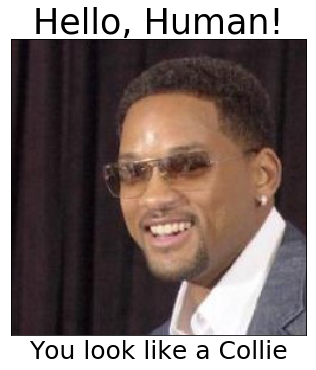

In [101]:
# Test
fig = plt.figure(figsize=(25, 25))

run_app("FaceClassifier/test/Face/Will_Smith_0001.jpg", fig)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
The outputs look better than expected. It is a really fun app to test on family members.

Regarding the possible improvements in the app:
- Increase the dropout probability as well as the number of epochs during training.
- Improve the `dog_detector` method by training a model from scratch (assuming data availability).
- Finally, to reach a greater accuracy, unfreeze some layers in the `features` part of the model.

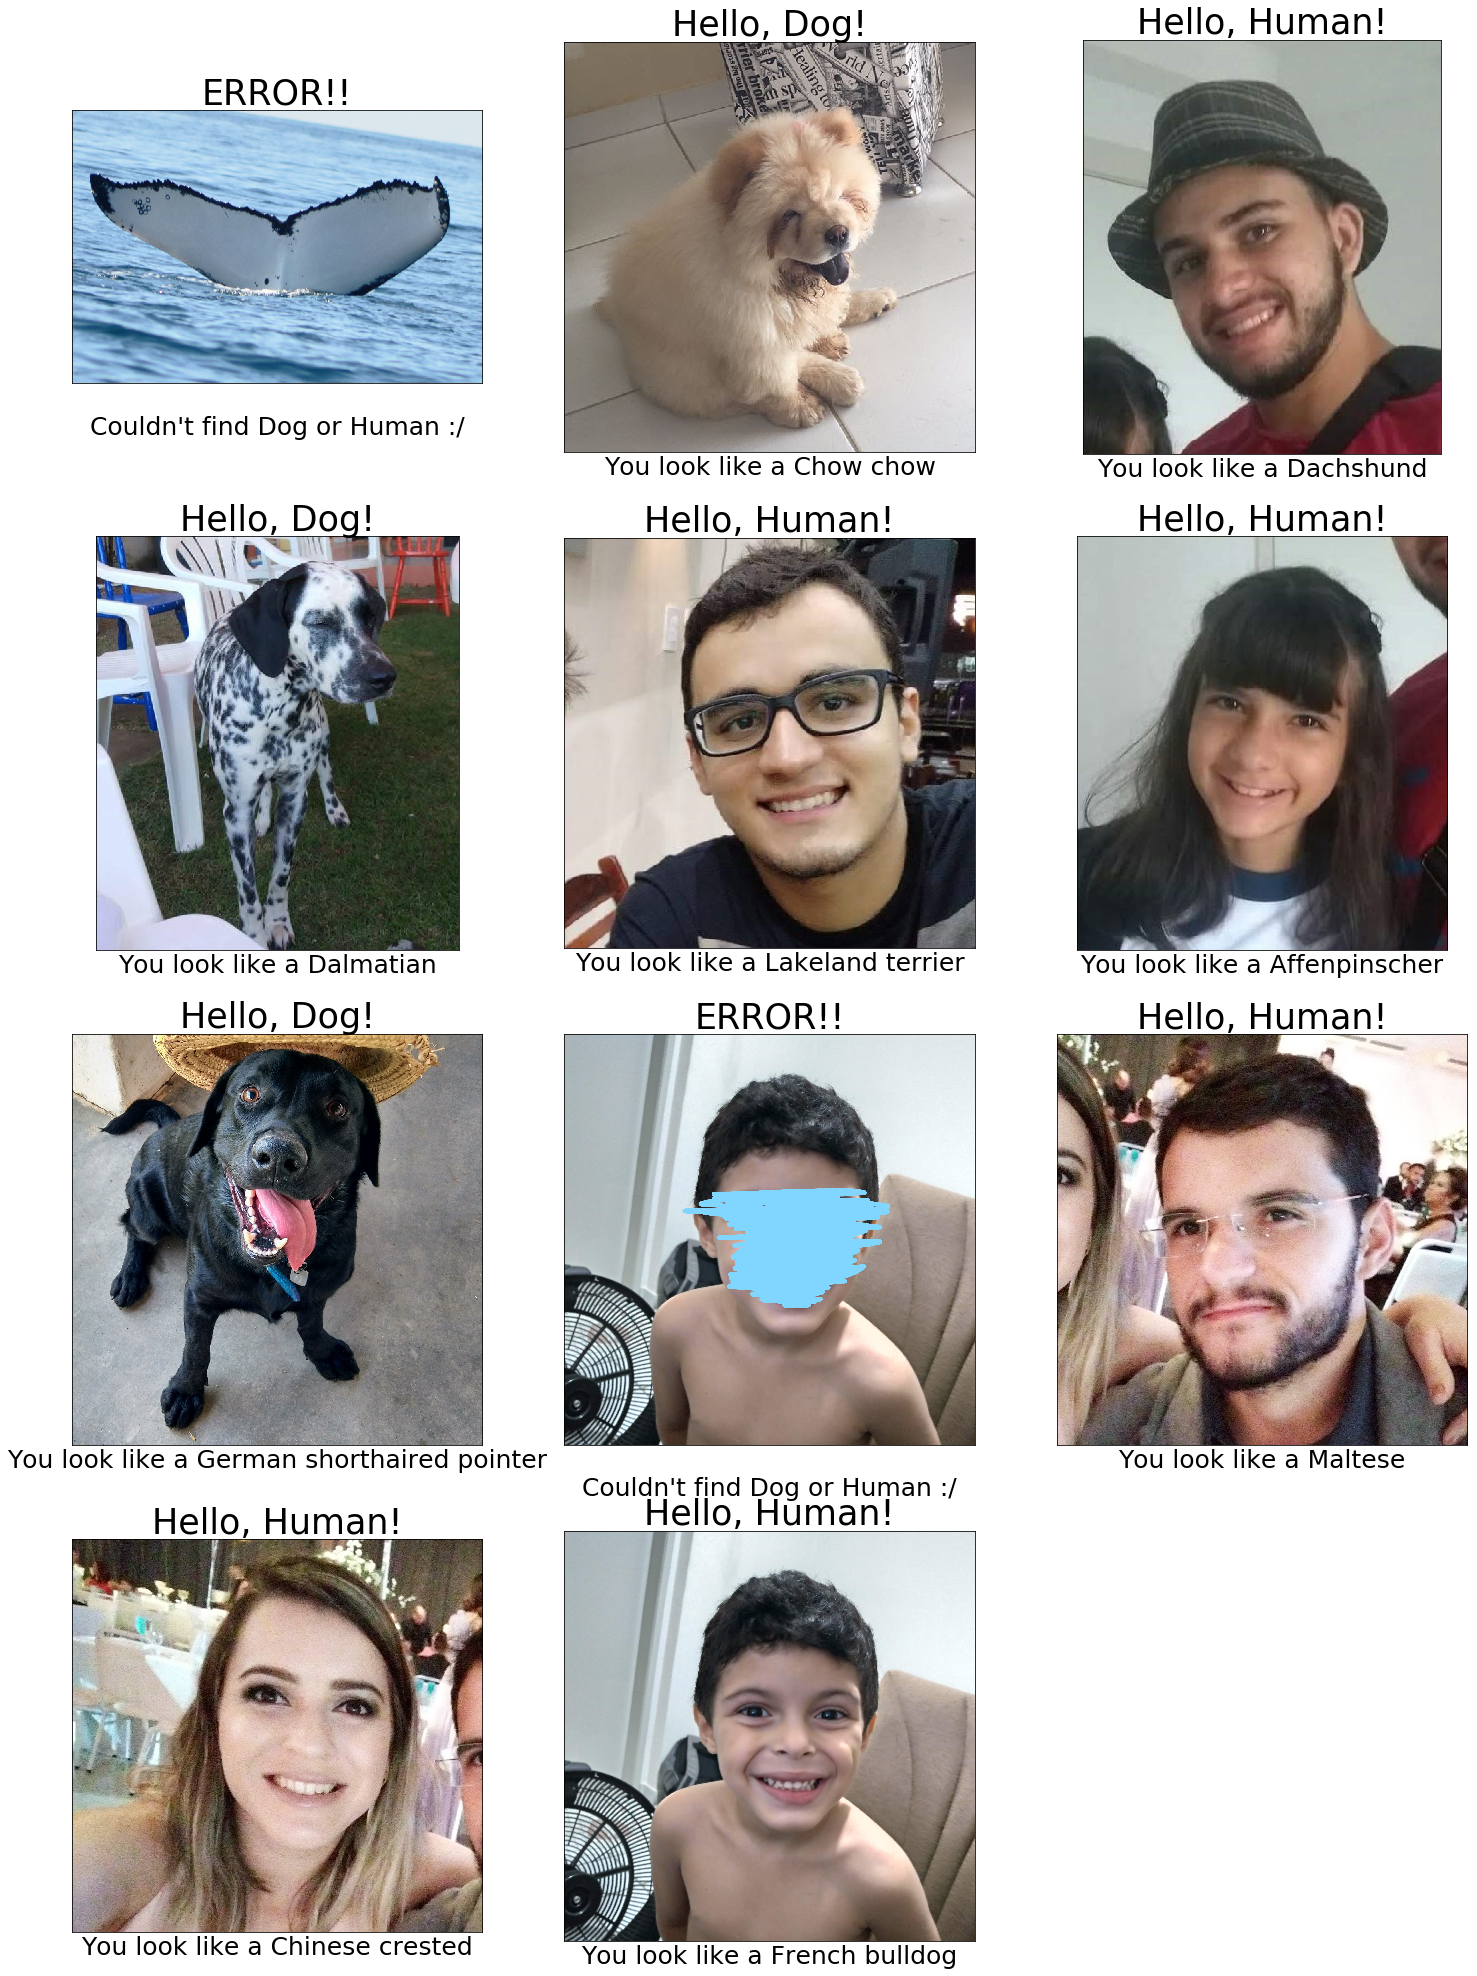

In [105]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
fig = plt.figure(figsize=(25, 35))
files = np.array(glob("additional_images/*"))

## suggested code, below
for idx, file in enumerate(files):
    run_app(file, fig, idx)